In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('loan.csv')

In [8]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [10]:
data.describe()

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [24]:
data['Gender'].value_counts()

Male      487
Female    111
Name: Gender, dtype: int64

<Axes: ylabel='Gender'>

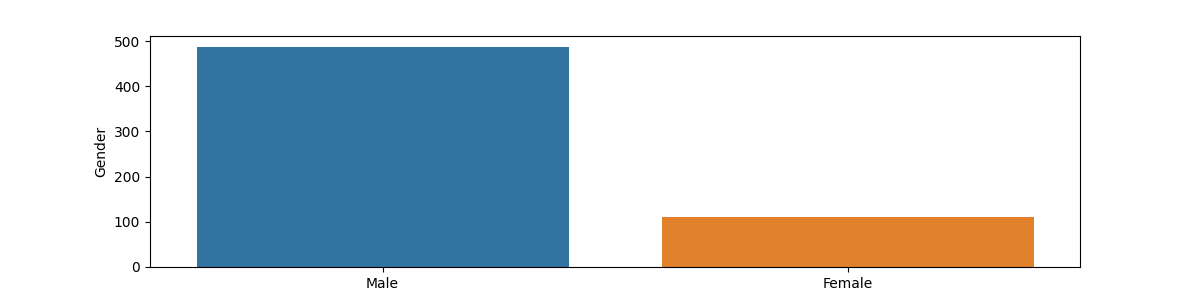

In [28]:
plt.close()
y = data['Gender'].value_counts() 
plt.figure(figsize=(12,3))
sns.barplot(x=list(y.index),y=y)

In [34]:
label_encoder = preprocessing.LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = label_encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])


#for col in list(obj[obj].index):
#   data[col] = label_encoder.fit_transform(data[col])

In [38]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


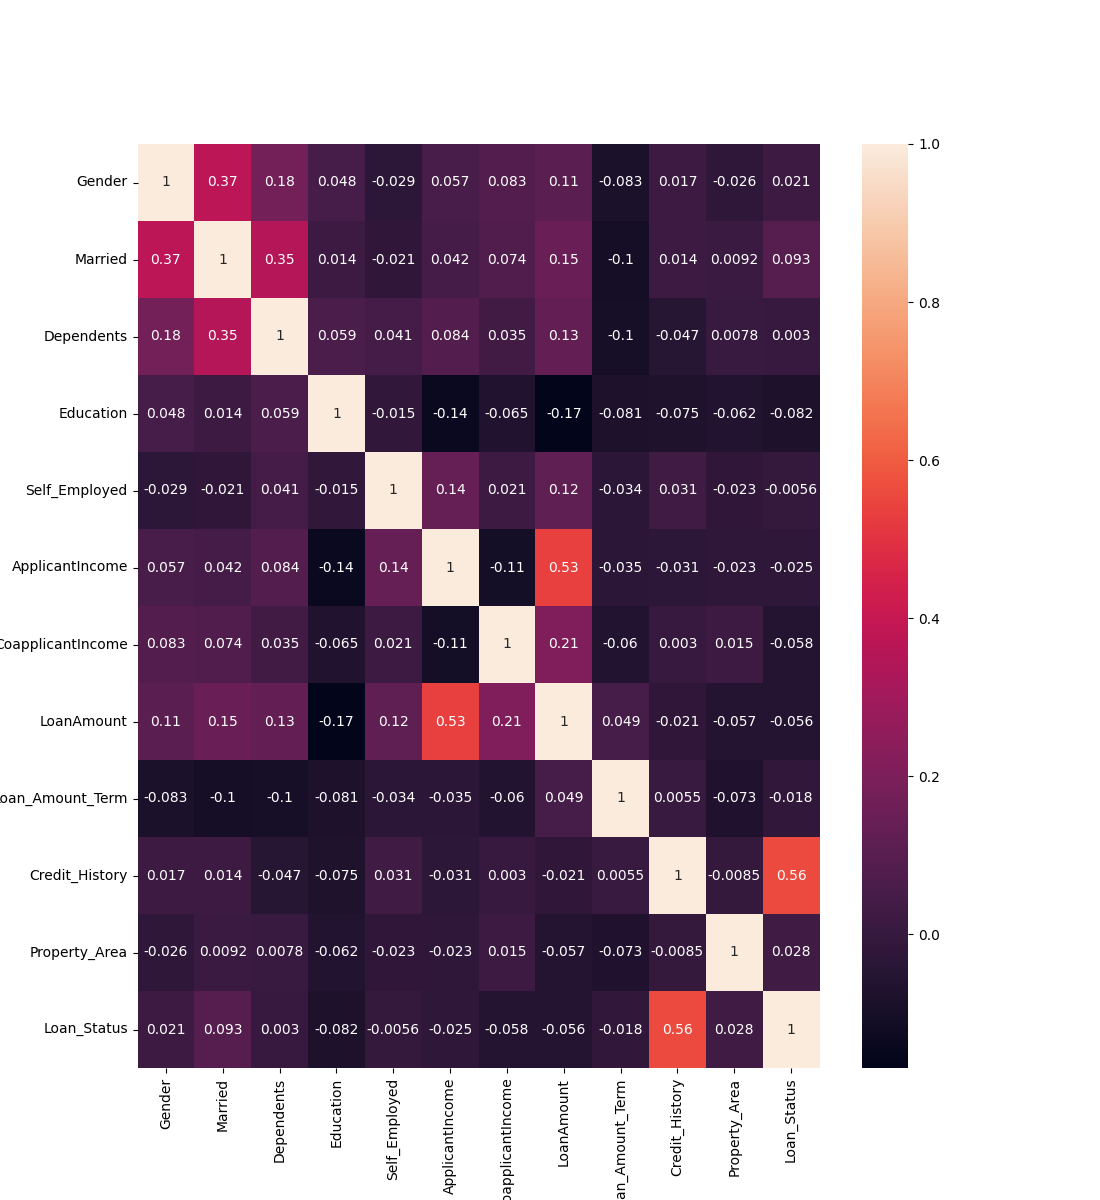

In [42]:
plt.close()
plt.figure(figsize=(11,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [45]:
data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
x = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((478, 11), (120, 11), (478,), (120,))

In [52]:
    model = LogisticRegression()
    model.max_iter = 10000
    model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [63]:
y_pred = model.predict(X_test)

In [64]:
print(metrics.accuracy_score(Y_test,y_pred) * 100, '%')

82.5 %
